
# fig-rl-perf

Generate a multi panel figure showing RL training performance.


In [1]:

import os

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from benchmarks import *


Loading rewards from 10 files
Min training length: 8540, max: 10420
Loading rewards from 80 files
Min training length: 1427, max: 2412
Loading rewards from 10 files
Min training length: 8988, max: 10600
Loading rewards from 80 files
Min training length: 2578, max: 2665
Loading rewards from 10 files
Min training length: 9539, max: 11550
Loading rewards from 80 files
Min training length: 1189, max: 1244
Loading rewards from 10 files
Min training length: 2555, max: 2644
Loading rewards from 80 files
Min training length: 1224, max: 1320
Loading rewards from 10 files
Min training length: 1433, max: 1559
Loading rewards from 80 files
Min training length: 1119, max: 1175


C:\Users\uqasnosw\AppData\Local\Continuum\miniconda3\envs\python36\lib\site-packages\ipykernel_launcher.py:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


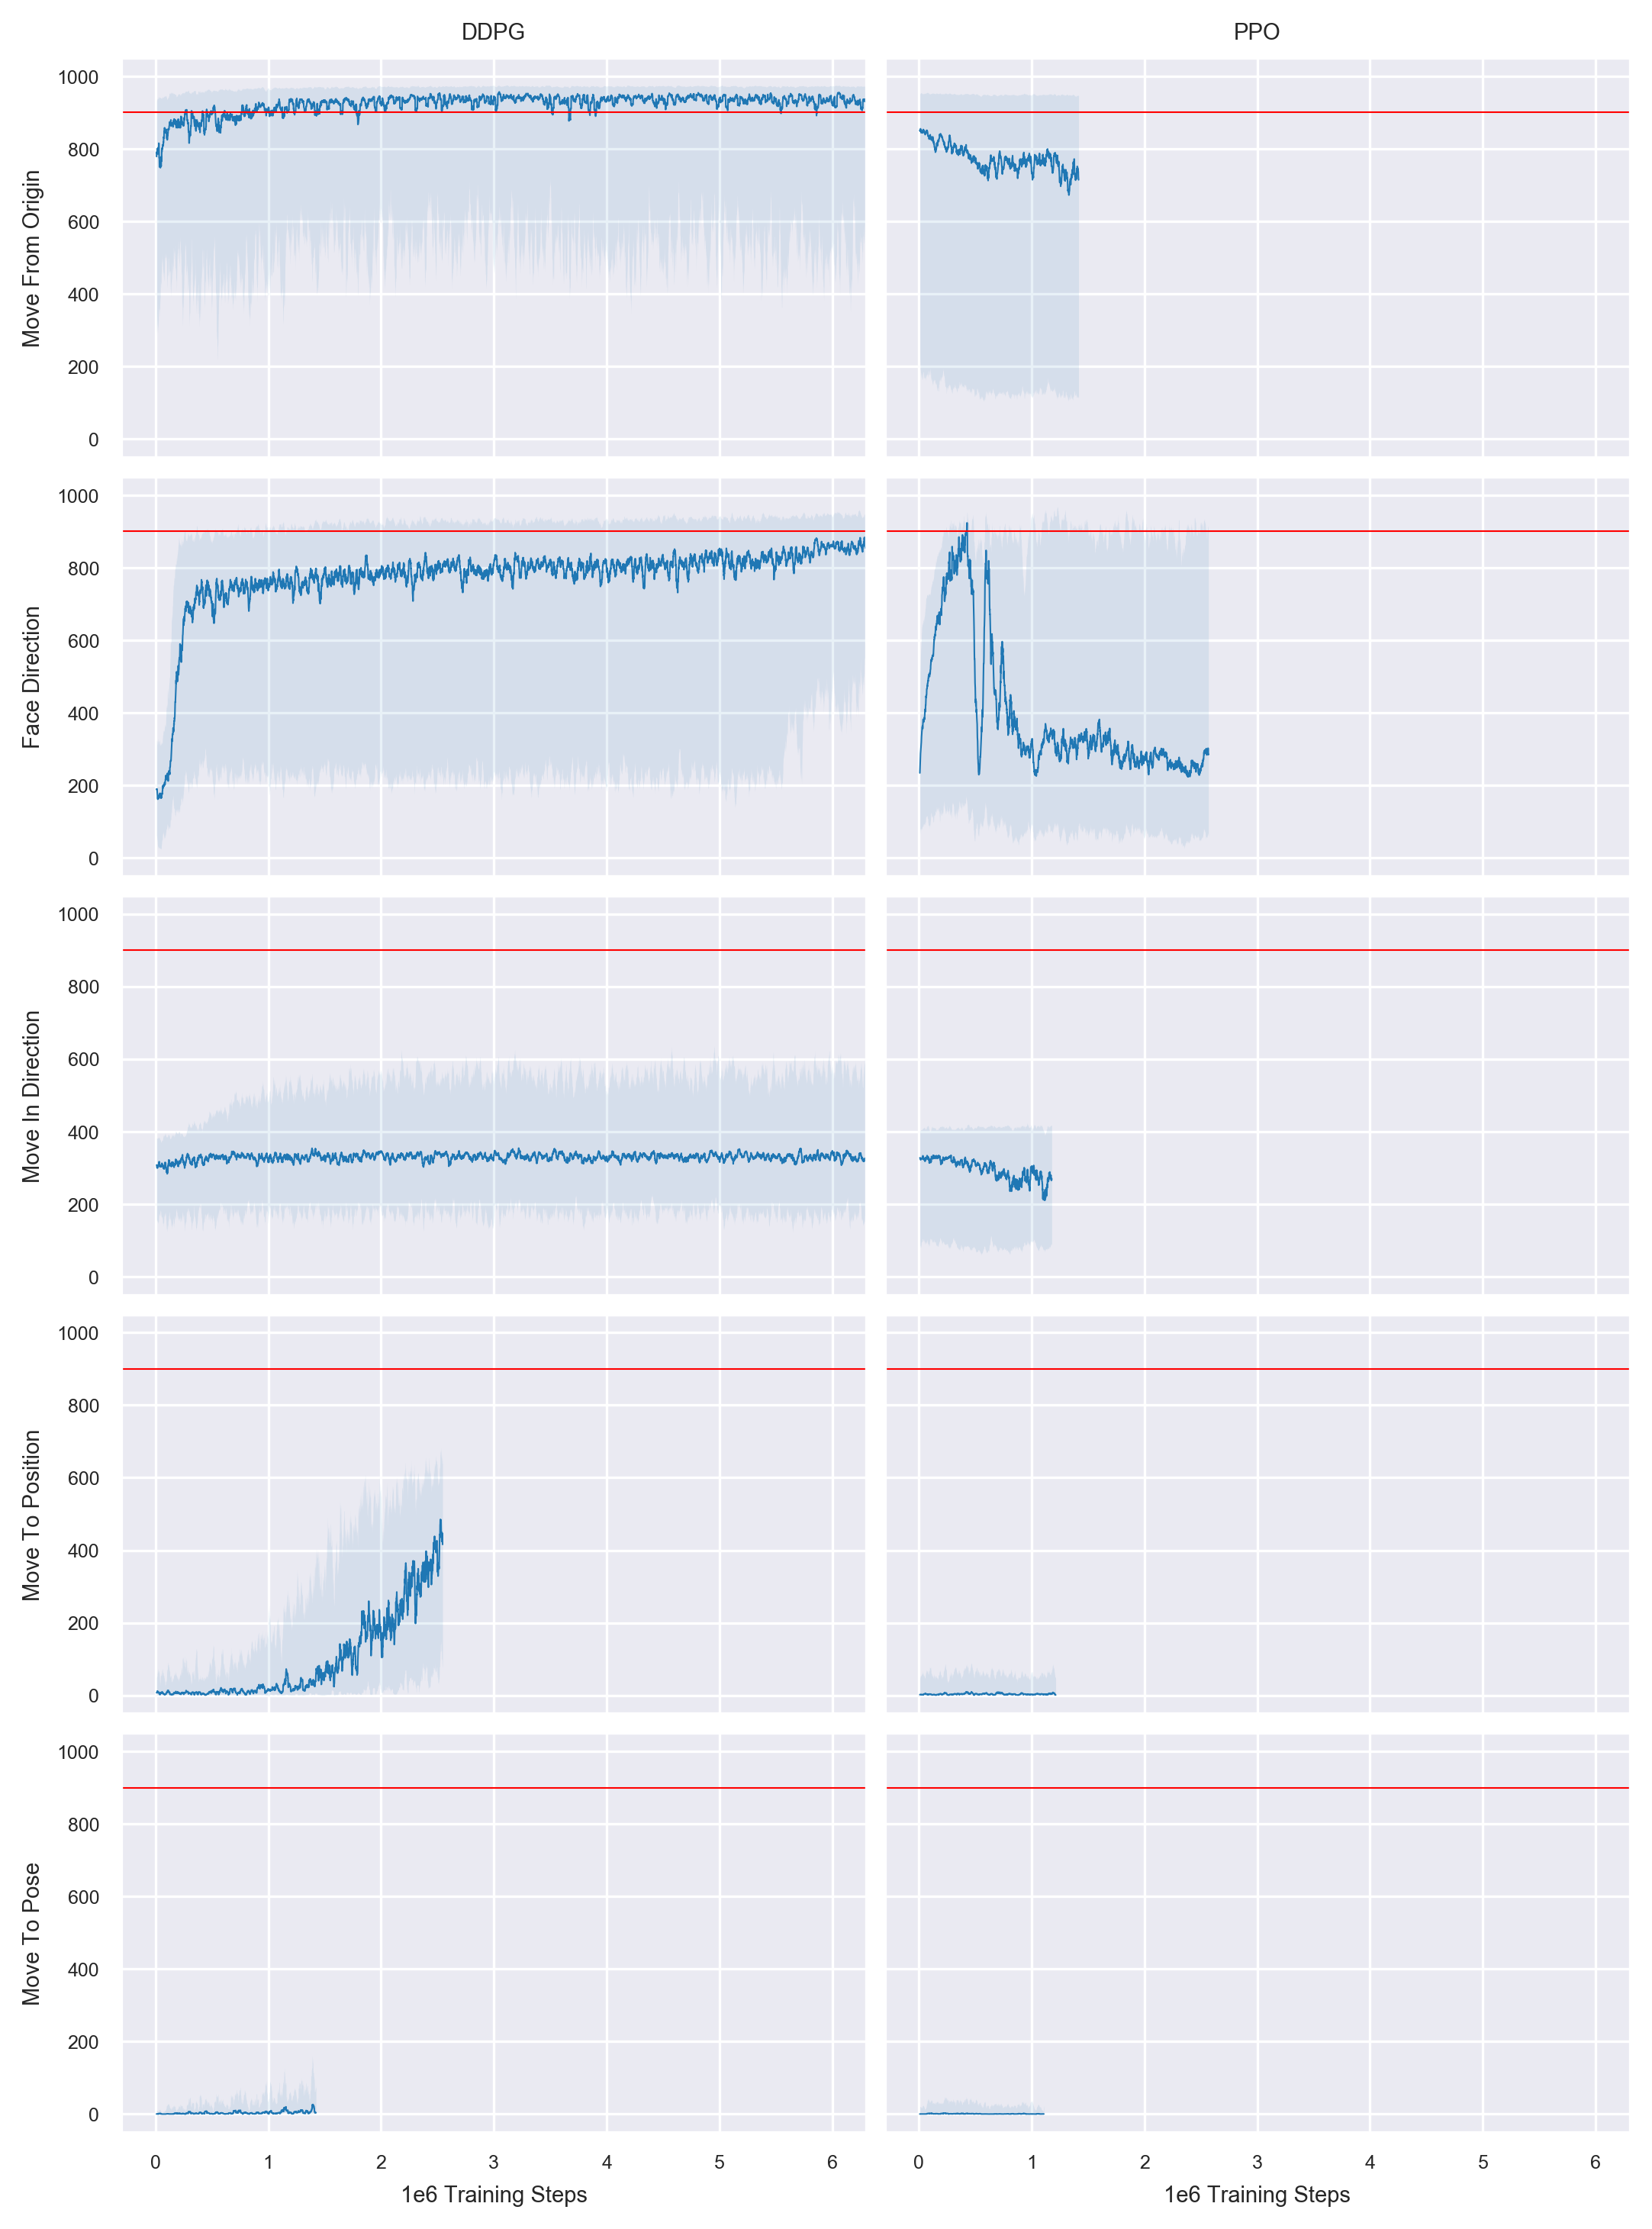

In [2]:

ma_window = 20
q = [10, 50, 90]
res_str = os.path.join("benchmarks", "results", "{}", "{}", "*", "*monitor.csv")

sns.set_style("darkgrid")
#sns.despine()

mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6
mpl.rcParams['axes.titlesize'] = 7
mpl.rcParams['axes.labelsize'] = 7

fig, axes = plt.subplots(
    5,
    2,
    sharex=True,
    sharey=True,
    gridspec_kw=dict(wspace=0.025, hspace=0.05),
    figsize=(8.5, 12),
    dpi=300,
)

pad = 0.05
yrange = 1000
xrange = 6e6 / 1e3
axes[0][0].set_xlim(-pad * xrange, xrange * (1 + pad))
axes[0][0].set_ylim(-pad * yrange, yrange * (1 + pad))

axes[0][0].set_ylabel("Move From Origin")
axes[1][0].set_ylabel("Face Direction")
axes[2][0].set_ylabel("Move In Direction")
axes[3][0].set_ylabel("Move To Position")
axes[4][0].set_ylabel("Move To Pose")

plt.xticks([0, 1e6/1e3, 2e6/1e3, 3e6/1e3, 4e6/1e3, 5e6/1e3, 6e6/1e3], labels=[0, 1, 2, 3, 4, 5, 6])
axes[4][0].set_xlabel("1e6 Training Steps")
axes[4][1].set_xlabel("1e6 Training Steps")

axes[0][0].set_title("DDPG")
axes[0][1].set_title("PPO")

solvedline = lambda: plt.axhline(900, color='r', lw=0.5)

# Move From Origin
plt.sca(axes[0][0])
plot_csv_glob(res_str.format("ddpg", "mfo"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.sca(axes[0][1])
plot_csv_glob(res_str.format("ppo2", "mfo"), ma_window, quartiles=q, lw=0.5)
solvedline()

# Face Direction
plt.sca(axes[1][0])
plot_csv_glob(res_str.format("ddpg", "fd"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.sca(axes[1][1])
plot_csv_glob(res_str.format("ppo2", "fd"), ma_window, quartiles=q, lw=0.5)
solvedline()

# Move In Direction
plt.sca(axes[2][0])
plot_csv_glob(res_str.format("ddpg", "mid"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.sca(axes[2][1])
plot_csv_glob(res_str.format("ppo2", "mid"), ma_window, quartiles=q, lw=0.5)
solvedline()

# Move To Position
plt.sca(axes[3][0])
plot_csv_glob(res_str.format("ddpg", "mtp"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.sca(axes[3][1])
plot_csv_glob(res_str.format("ppo2", "mtp"), ma_window, quartiles=q, lw=0.5)
solvedline()

# Move To Pose
plt.sca(axes[4][0])
plot_csv_glob(res_str.format("ddpg", "mtpose"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.sca(axes[4][1])
plot_csv_glob(res_str.format("ppo2", "mtpose"), ma_window, quartiles=q, lw=0.5)
solvedline()

plt.tight_layout()
plt.savefig(
    os.path.join("manuscript", "figures", "fig-rl-perf.pdf"),
    dpi=300,
    bbox_inches='tight',
    pad_inches=0
)
plt.show()
plt.close()
